# **Import Libraries**

In [ ]:
import pandas as pd
import csv
import tweepy
import re
import io
import spacy
import nltk
import numpy as np
    
    
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import collections
import os


from io import StringIO

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Twitter API**
Incase you have the API Key Code plug in and run the code till line 9
If not please run the code from line 10 onwards

In [ ]:
# consumer_key =''
# consumer_secret =''
# access_token = ''
# access_token_secret =''
# since_id='2022-10-19'
# hashtag_phrase = '#datascience'

In [ ]:
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

In [ ]:
# api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

In [ ]:
# new=[]
# for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets',lang="en", tweet_mode='extended',since_id=since_id).items(700):
#        x=tweet.created_at, tweet.full_text.replace('\n',' ')
#        new.append(x)

In [ ]:
# df = pd.DataFrame(new,columns =['Date Time','Text'])

In [ ]:
# df.head(5)

# **Downloading CSV**

In [ ]:
# from google.colab import files

# df.to_csv('Twitter API Data for Data Science.csv')
# files.download('Twitter API Data for Data Science.csv')

# **Using CSV**

In [ ]:
df=pd.read_csv('Twitter API Data for Data Science.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Date Time,Text
0,0,2023-03-02 21:16:13,E-commerce and Amazon Crash Course https://t.c...
1,1,2023-03-02 21:16:06,If your account is Hacked or your Account bein...
2,2,2023-03-02 21:15:27,"Become an Instagram Manager, from Beginner to ..."
3,3,2023-03-02 21:14:44,MD Police call signs used over a month. #data...
4,4,2023-03-02 21:13:29,"From the office to the gym, data science is a ..."


In [ ]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
df.drop(['Date Time'], axis=1,inplace=True)

In [ ]:
df.head(5)

,Text
0,E-commerce and Amazon Crash Course https://t.c...
1,If your account is Hacked or your Account bein...
2,"Become an Instagram Manager, from Beginner to ..."
3,MD Police call signs used over a month. #data...
4,"From the office to the gym, data science is a ..."


In [ ]:
pol=[]
for i in df.Text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [ ]:
df['pol']=pol

In [ ]:
df['pol'][df.pol==0]= 0
df['pol'][df.pol > 0]= 1
df['pol'][df.pol < 0]= -1

<ipython-input-17-6db5e75207e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pol'][df.pol==0]= 0
<ipython-input-17-6db5e75207e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pol'][df.pol > 0]= 1
<ipython-input-17-6db5e75207e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pol'][df.pol < 0]= -1


In [ ]:
df_positive = df[df.pol==1]
df_negative = df[df.pol==-1]
df_neutral = df[df.pol==0]

In [ ]:
df_positive.head(5)

,Text,pol
1,If your account is Hacked or your Account bein...,1.0
4,"From the office to the gym, data science is a ...",1.0
5,"🚨🚨[Deadline TODAY March 2] $10,000 in prizes a...",1.0
7,"""Data scientists spend a lot of their time ana...",1.0
9,C++ mostly used in. Rn #ArtificialIntelligence...,1.0


# **Stop Words**

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('co')
stop_words.append('https')
stop_words.append('516081j3jf')


# **Analysis of Most Common Word**


In [ ]:
def comments(tweet):
  tweet_comments=[]
  for tweets in tweet:
      tweet_comments.append(tweets)

  lower_tweets=[]
  for i in tweet_comments:
    lower_tweets.append(i.lower()) 

  lower_tweets=str(lower_tweets) 
  
  tokenize=word_tokenize(lower_tweets)    

  r=str(tokenize)
  
  tokenizer = nltk.RegexpTokenizer(r"\w+")

  new_words = tokenizer.tokenize(r)

  filtered_sentence = []

  for w in new_words:
    if w not in stop_words:
        filtered_sentence.append(w)

  k=str(filtered_sentence)

 
  
  words = re.findall(r'\w+', k)

  
  most_common = collections.Counter(words).most_common()
  x=dict(most_common)
  y = pd.DataFrame.from_dict(x, orient="index").reset_index()
  y.columns = ['Words', 'No of Repetation']

  y.head(30).plot(x='Words', y='No of Repetation', kind='bar', figsize=(15, 7), color = 'purple')
  plt.title("Most Frequently Occuring Words - Top 30")
  return y



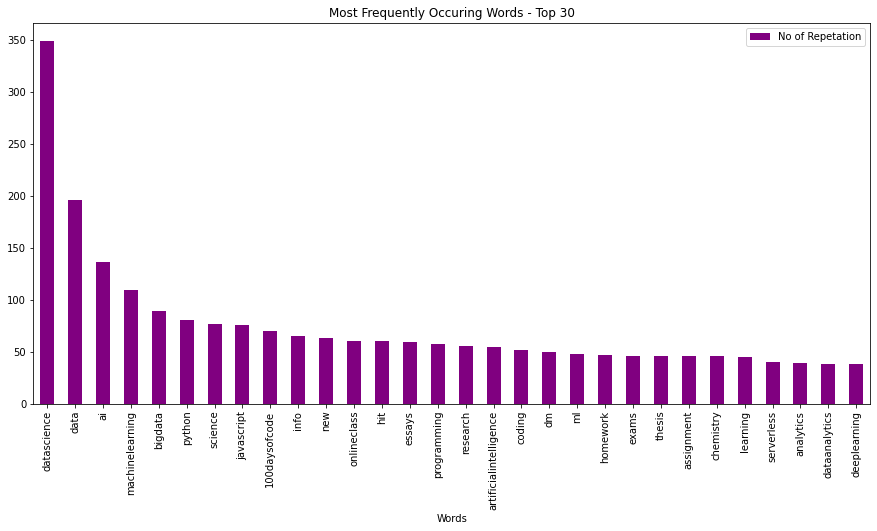

In [ ]:
positive=(comments(df_positive['Text']))

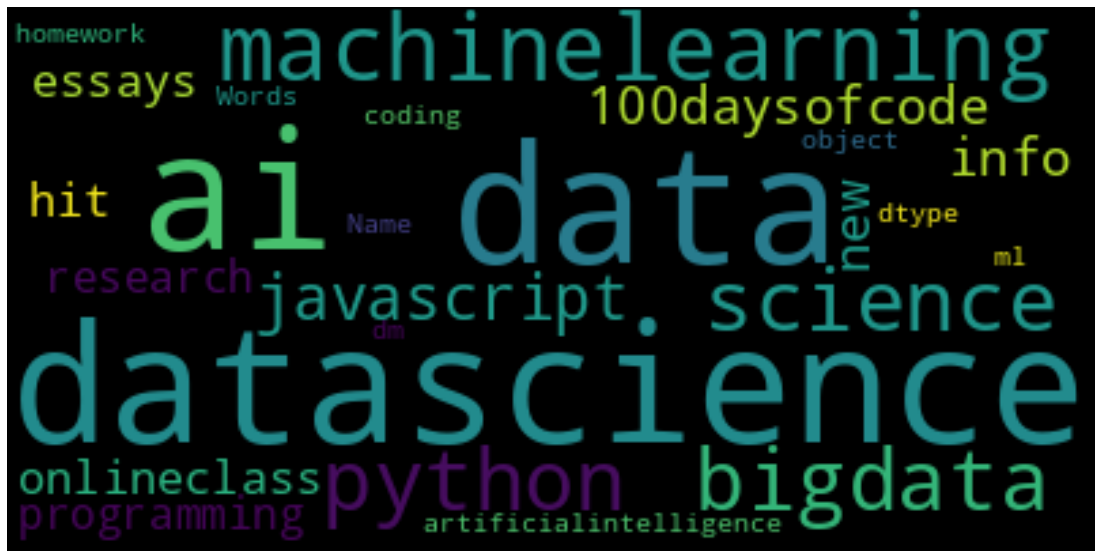

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud().generate(str(positive['Words'][0:21]))

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()